In [7]:
from scipy.integrate import odeint
from scipy import arange
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [8]:
### Rossler attractor Model Class
class rossler:
    ## Must be in same order as dXdt return
    label = ['x', 'y', 'z']
    nVar = len(label)

    ## Parameters
    p = {
    'a': 0.15,
    'b': 0.2,
    'c': 10.0
    }

    ## Get initial values for the system
    def __init__(self, X0 = [0.3, 0.2, 0.1]):
        self.name = self.__class__.__name__
        if self.nVar != len(X0):
            print 'ERROR:', self.nVar, 'initial values required for:', self.name
        else: 
            self.X0 = X0

    ## Define the dX/dt for the system
    def dXdt(self, X, t):
        x, y, z = X

        dxdt = -y - z
        dydt = x + self.p['a']*y
        dzdt = self.p['b']*x + z*(x - self.p['c'])
        
        return dxdt, dydt, dzdt

In [9]:
## Time interval of the simulations
t = arange(0.0, 50.0, 0.01)
m = rossler()

## Solving the diffential equations
sol = odeint(m.dXdt, m.X0, t)

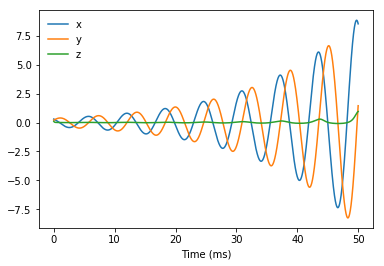

In [10]:
## Plot solution timeseries
fig, ax = plt.subplots()
for i, v in enumerate(m.label):
    figY = plt.plot(t, sol[:,i], label=v)

plt.xlabel('Time (ms)')
plt.legend(frameon=False)
plt.show()

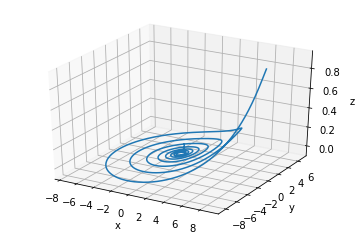

In [11]:
## Phase portrait
fig = plt.figure()
ax = fig.gca(projection='3d')

x, y, z = sol.T
ax.plot(x, y, z)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()